In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:/csvFiles/rank_salary.csv")

In [3]:
df.head()

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000


In [4]:
df.shape

(10, 3)

In [5]:
df.info

<bound method DataFrame.info of               Position  Level   Salary
0  Teaching Assistants      1    45000
1        Guest Faculty      2    50000
2  Contractual Faculty      3    60000
3  Assistant Professor      4    80000
4  Associate Professor      5   110000
5            Professor      6   150000
6       Associate Dean      7   200000
7                 Dean      8   300000
8      Vice Chancellor      9   500000
9           Chancellor     10  1000000>

In [6]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [7]:
x = df.iloc[:,1:2].values
y = df.iloc[:,2:].values

In [8]:
#fitting linear regression to dataset

from sklearn.linear_model import LinearRegression

In [9]:
lmodel = LinearRegression()
lmodel.fit(x, y)
ypred = lmodel.predict(x)

In [10]:
# Fitting Polynomial Regression to the dataset

from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(x)
poly.fit(x_poly, y)

lmodel2 = LinearRegression()
lmodel2.fit(x_poly, y)

LinearRegression()

In [12]:
pred = lmodel2.predict(poly.fit_transform(x))

In [13]:
# Visualising the Polynomial Regression results

import matplotlib.pyplot as plt

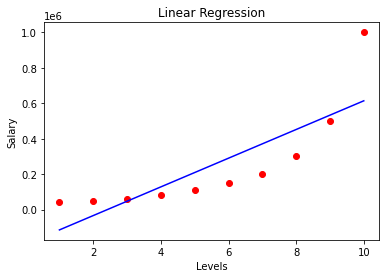

In [14]:
# plot of linear regression

plt.scatter(x,y,color="red")  
plt.plot(x, ypred, color="blue")  
plt.title("Linear Regression")  
plt.xlabel("Levels")  
plt.ylabel("Salary")  
plt.show()

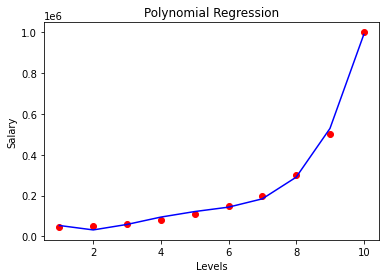

In [15]:
#plot of polynomial regression

plt.scatter(x,y,color="red")  
plt.plot(x, pred, color="blue")  
plt.title("Polynomial Regression")  
plt.xlabel("Levels")  
plt.ylabel("Salary")  
plt.show()

In [16]:
pred_lin_df= pd.DataFrame(ypred, columns=['Pred_Salary'])
pred_lin_df['Pred_Salary']= pred_lin_df['Pred_Salary'].astype(int)

pred_poly_df= pd.DataFrame(pred, columns=['Pred_Poly_Salary'])
pred_poly_df['Pred_Poly_Salary']= pred_poly_df['Pred_Poly_Salary'].astype(int)

pred_df = pd.concat([pred_lin_df, pred_poly_df], axis=1, join='inner')
pred_df

,Pred_Salary,Pred_Poly_Salary
0,-114454,53356
1,-33575,31759
2,47303,58642
3,128181,94632
4,209060,121724
5,289939,143275
6,370818,184003
7,451696,289994
8,532575,528694
9,613454,988916
